In [17]:
import numpy as np
from matplotlib import pyplot as plt
import os
import glob
import pandas as pd

In [22]:
cidades = ["aracaju", "joaopessoa", "maceio", "natal", "recife", "salvador", "saoluis", "teresina", "fortaleza"]

def create_Metrics_dataframe(cidades):

    dict_metrics_list = []

    for cidade in cidades:
        # Using readlines()
        #print(cidade)
        list_of_files = glob.glob("./cidades/{0}/AutoMLResults/results_*.txt".format(cidade)) # * means all if need specific format then *.csv
        last_result_file = os.path.basename(max(list_of_files, key=os.path.getctime))
        #print(last_result_file)
        results_file = open("./cidades/{0}/AutoMLResults/{1}".format(cidade, last_result_file), 'r')
        result_Lines = results_file.readlines()
        
        count = 0
        # Strips the newline character
        for line in result_Lines:
            count += 1
            lineContent = line.strip()
            #print("Line{}: {}".format(count, lineContent))
            if "Scores" not in lineContent:
                dict_metrics = {"city":"", "metric":"", "value":"", "automl":""}
                metric=lineContent[lineContent.find("-")+1:lineContent.find(":")].strip()
                value=float(lineContent[lineContent.find(":")+1:].strip())
                automl=lineContent[:lineContent.find("-")-1].strip()
                if metric != "MAPE":
                    dict_metrics["city"]=cidade
                    dict_metrics["metric"]=metric
                    dict_metrics["value"]=value
                    dict_metrics["automl"]=automl
                    dict_metrics_list.append(dict_metrics)

    df = pd.DataFrame(dict_metrics_list)
    df.replace("joaopessoa", "João Pessoa", inplace=True)
    df.replace("saoluis", "São Luis", inplace=True)
    df.city = df.city.apply(lambda x: x.capitalize())

    return df

df_metrics = create_Metrics_dataframe(cidades)

In [32]:
df_metrics.head(5)

,city,metric,value,automl
0,Aracaju,MAE,0.0187,TPOT
1,Aracaju,SMAPE,157.0133,TPOT
2,Aracaju,MSE,0.0010,TPOT
3,Aracaju,MAE,0.0772,HYPEROPT
4,Aracaju,SMAPE,167.5173,HYPEROPT


Text(0, 0.5, 'SMAPE')

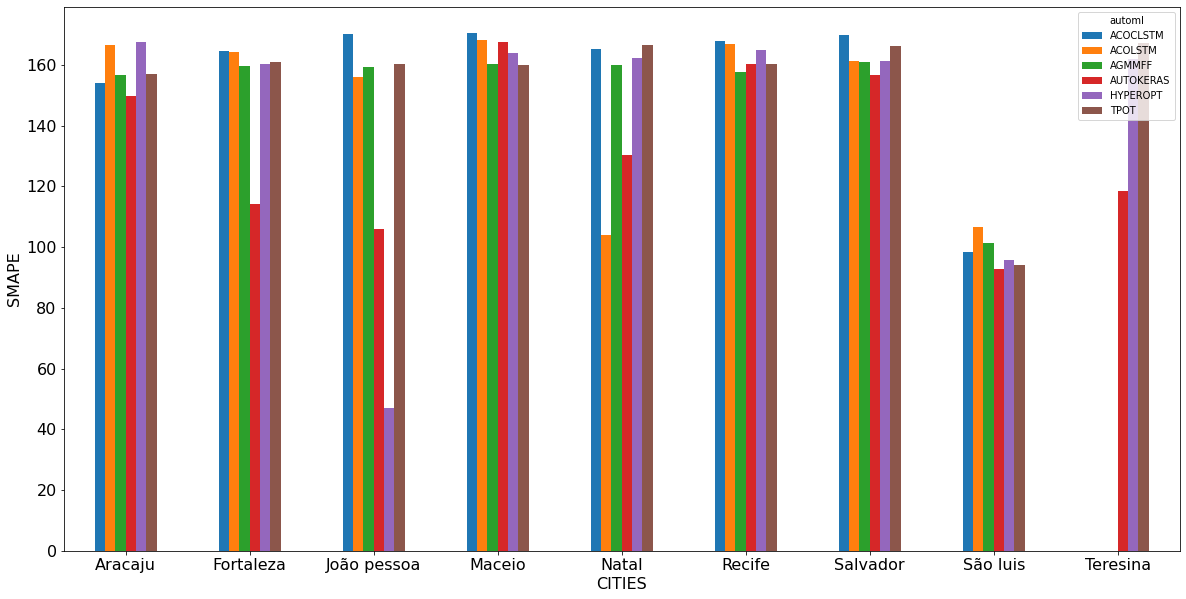

In [28]:
ax1=df_metrics[df_metrics["metric"]=="SMAPE"].pivot(index="city", columns="automl", values="value").plot(fontsize=16,figsize=(20,10), kind="bar", rot=0)
ax1.set_xlabel('CITIES',fontdict={'fontsize':16})
ax1.set_ylabel('SMAPE',fontdict={'fontsize':16})

Text(0, 0.5, 'MAE')

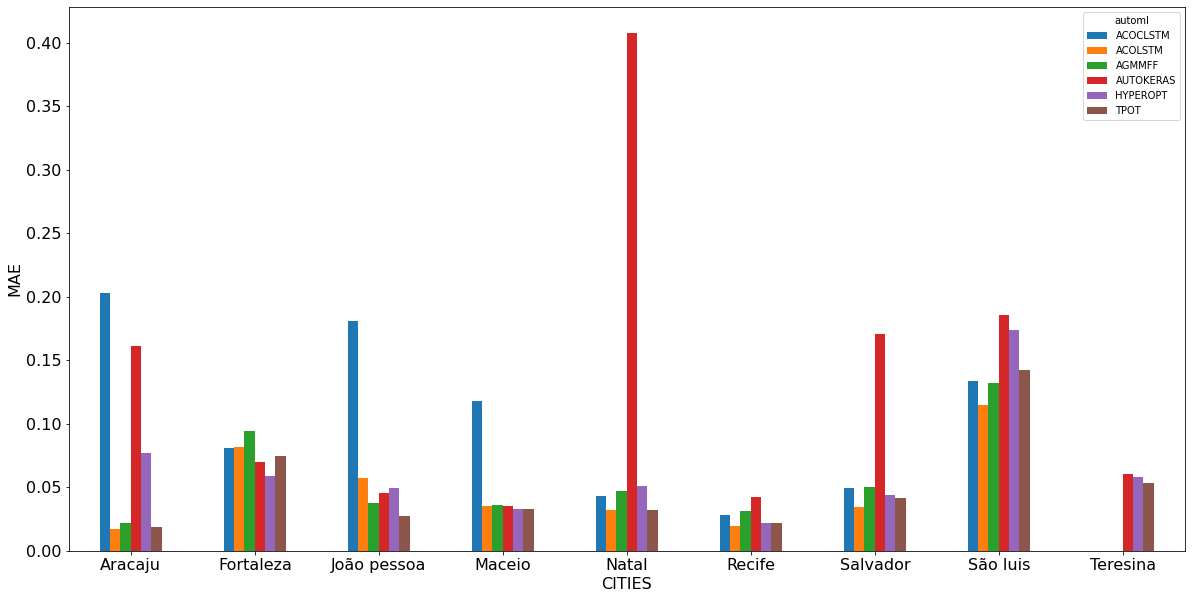

In [29]:
ax1=df_metrics[df_metrics["metric"]=="MAE"].pivot(index="city", columns="automl", values="value").plot(fontsize=16,figsize=(20,10), kind="bar", rot=0)
ax1.set_xlabel('CITIES',fontdict={'fontsize':16})
ax1.set_ylabel('MAE',fontdict={'fontsize':16})

Text(0, 0.5, 'MSE')

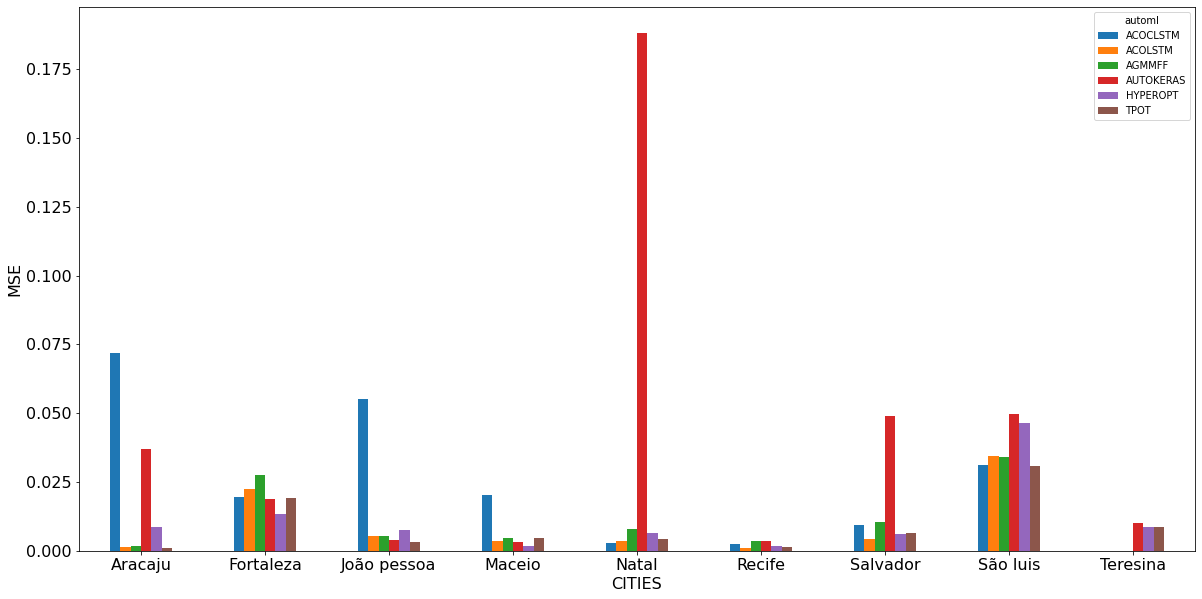

In [30]:
ax1=df_metrics[df_metrics["metric"]=="MSE"].pivot(index="city", columns="automl", values="value").plot(fontsize=16,figsize=(20,10), kind="bar", rot=0)
ax1.set_xlabel('CITIES',fontdict={'fontsize':16})
ax1.set_ylabel('MSE',fontdict={'fontsize':16})